In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 39.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.8MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten ,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalized
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding= 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
 history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 1.1101 - accuracy: 0.6126 - val_loss: 0.5917 - val_accuracy: 0.7176
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5391 - accuracy: 0.7240 - val_loss: 0.6178 - val_accuracy: 0.6574
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4606 - accuracy: 0.7826 - val_loss: 0.6094 - val_accuracy: 0.7162
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.4386 - val_accuracy: 0.7952
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3557 - accuracy: 0.8404 - val_loss: 0.5363 - val_accuracy: 0.7506
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2904 - accuracy: 0.8735 - val_loss: 0.5544 - val_accuracy: 0.7446
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2114 - accuracy: 0.9112 - val_loss: 0.7074 - val_ac

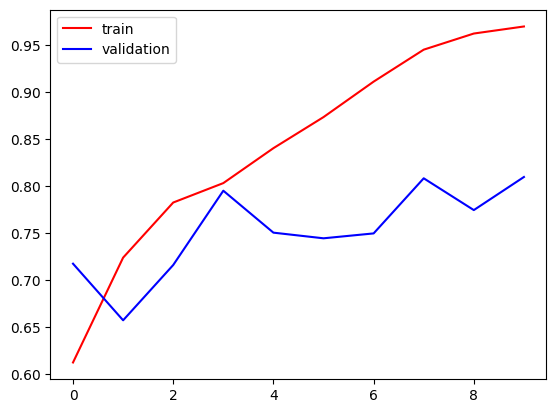

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

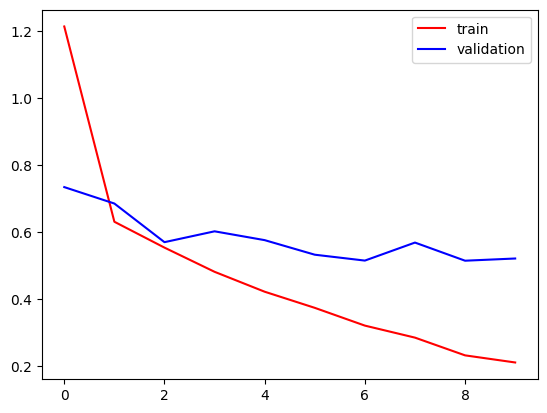

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/dog.jpg')

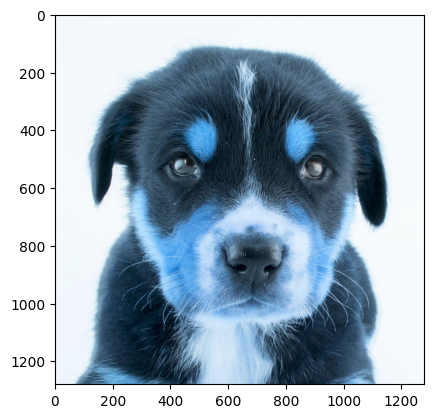

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape


(639, 640, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)